In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from glob import glob
import keras
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from PIL import Image
from tensorflow.keras.utils import to_categorical
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data="/Users/madhurabhagat/Downloads/Breast_Cancer/BUS_UC/BUS_UC/BUS_UC"

In [3]:
print("Length of Data:",len(data))

Length of Data: 65


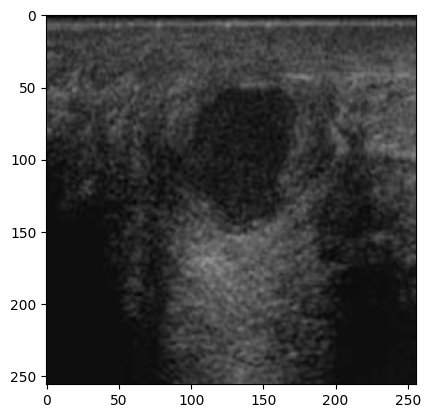

In [4]:
img=mpimg.imread("/Users/madhurabhagat/Downloads/Breast_Cancer/BUS_UC/BUS_UC/BUS_UC/Benign/images/04.png")
imgplot=plt.imshow(img)
plt.show()

In [5]:
type(img)

numpy.ndarray

# Image Preprocessing

In [6]:
gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
resized=cv2.resize(gray,(224,224))
normalized=resized/255.0

# Exploratory Data Analysis

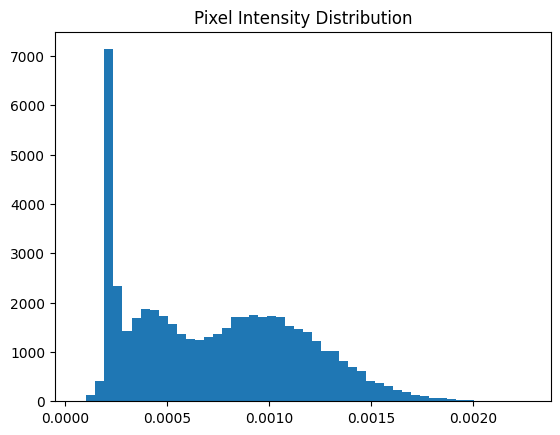

In [7]:
plt.hist(normalized.ravel(), bins=50)
plt.title('Pixel Intensity Distribution')
plt.show()

# Feature Engineering

In [8]:
benign_paths = glob(data + "/Benign/images/*.png")
malignant_paths = glob(data + "/Malignant/images/*.png")

In [9]:
X=[]
Y=[]

In [10]:
for path in benign_paths:
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(224,224))
    X.append(resized/255.0)
    Y.append(0)
for path in malignant_paths:
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    resized=cv2.resize(gray,(224,224))
    X.append(resized/255.0)
    Y.append(1)

In [11]:
X = np.array(X).reshape(-1, 224, 224, 1) 
Y = to_categorical(Y, num_classes=2)

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#  Build the CNN Model

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=25, batch_size=32)

Epoch 1/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.4968 - loss: 0.8997 - val_accuracy: 0.5460 - val_loss: 0.6890
Epoch 2/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5699 - loss: 0.6831 - val_accuracy: 0.5521 - val_loss: 0.6853
Epoch 3/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5491 - loss: 0.6850 - val_accuracy: 0.5521 - val_loss: 0.6750
Epoch 4/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5838 - loss: 0.6729 - val_accuracy: 0.5828 - val_loss: 0.6596
Epoch 5/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6222 - loss: 0.6631 - val_accuracy: 0.5583 - val_loss: 0.6617
Epoch 6/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6168 - loss: 0.6504 - val_accuracy: 0.5583 - val_loss: 0.6590
Epoch 7/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.6711 - loss: 0.6076 - val_accuracy: 0.6135 - val_loss: 0.6358
Epoch 8/25
21/21 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7049 - loss: 0.5921 - val_accuracy: 0.6687 - val_loss:

In [16]:
loss,acc=model.evaluate(X_test,Y_test)
print("Test Accuracy :",acc)
print("Test Loss :",loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 235ms/step - accuracy: 0.6431 - loss: 1.6649
Test Accuracy : 0.6441717743873596
Test Loss : 1.5965667963027954


In [19]:
model.save("breast_ultrasound_model.h5")
model = load_model("breast_ultrasound_model.h5")

# Predictive System 

In [20]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (224, 224))
    normalized = resized / 255.0
    reshaped = normalized.reshape(1, 224, 224, 1) 
    return reshaped
def predict(img_path):
    image = preprocess_image(img_path)
    prediction = model.predict(image)
    class_index = np.argmax(prediction)

    labels = ["Benign", "Malignant"]
    print(f"Prediction: {labels[class_index]} (Confidence: {prediction[0][class_index]:.2f})")


In [24]:
predict("/Users/madhurabhagat/Downloads/Breast_Cancer/BUS_UC/BUS_UC/BUS_UC/Malignant/images/001.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: Malignant (Confidence: 1.00)
